# *Random Forest*

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
columnname = pd.read_excel("features.xlsx")
column = columnname["degiskenismi"]

In [5]:
x_train = pd.read_excel("x_train.xlsx", names = column)
x_test = pd.read_excel("x_test.xlsx", names = column)
y_train = pd.read_excel("y_train.xlsx", names = ["activity"]) -1
y_test = pd.read_excel("y_test.xlsx", names = ["activity"]) -1

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
rf = RandomForestClassifier().fit(x_train,y_train.values.ravel())

In [8]:
y_pred = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9276985743380856

# Random Forest GridSearchCV

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
param_grid = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [13]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [15]:
grid_search.fit(x_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000]})

In [16]:
rf_best = RandomForestClassifier(**grid_search.best_params_)
rf_best.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10,
                       n_estimators=500)

In [17]:
accuracy = rf_best.score(x_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9253224711473184


In [18]:
y_pred = rf_best.predict(x_test)

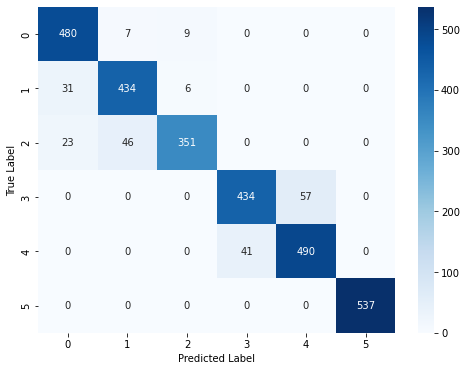

In [21]:

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       496
           1       0.89      0.92      0.91       471
           2       0.96      0.84      0.89       420
           3       0.91      0.88      0.90       491
           4       0.90      0.92      0.91       531
           5       1.00      1.00      1.00       537

    accuracy                           0.93      2946
   macro avg       0.93      0.92      0.92      2946
weighted avg       0.93      0.93      0.93      2946

